# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

/datasets/games.csv - датасет

## Изучение данных

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
pd.options.mode.chained_assignment = None
#pd.options.display.float_format = '{:,.4f}'.format

In [2]:
path = '/datasets/games.csv'

In [3]:
df = pd.read_csv(path)
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу видно, что время (Year_of_Release) в неправильном формате, Rating,  User_Score также в неправильном формате, данные столбцы будут изменены на следующем этапе.

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Также видно, что время может быть с дробной частью, поэтому его стоит сначала округлить до нижнего значения, также на первый взгляд столбцы с продажами выглядит подозрительно, сильный разброс между наименьшим и наибольшим значениями учитывая, что значений в столбцах в целом много.

In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [7]:
df.isna().agg(['sum', 'mean']).T

,sum,mean
Name,2.0,0.000120
Platform,0.0,0.000000
Year_of_Release,269.0,0.016093
Genre,2.0,0.000120
NA_sales,0.0,0.000000
EU_sales,0.0,0.000000
JP_sales,0.0,0.000000
Other_sales,0.0,0.000000
Critic_Score,8578.0,0.513192
User_Score,6701.0,0.400897


По данной таблице видно в каких столбцах пропущены значения, сколько их и какую долю они занимают

## Предобработка данных
Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [8]:
df.columns = [str(x.lower()) for x in df.columns]
cols = ['name', 'platform', 'genre', 'rating']
for col in cols:
    df[col] = df[col].str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df['year_of_release']  = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype('float')
df['critic_score'] = df['critic_score'].astype('float')
df_clean = df.dropna(subset=['name','genre','year_of_release'])
df_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df_clean['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [12]:
df_clean.duplicated().sum()

0

Явных дубликатов не было обнаружено

In [13]:
df_clean['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Неянвых дубликатов среди названий платформ также не было обнаружено

In [14]:
df_clean['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Неявных дубликатов среди названий жанров также не было обнаружено

In [15]:
array = list(df_clean['name'].sort_values().unique())
array

[' beyblade burst',
 ' fire emblem fates',
 " frozen: olaf's quest",
 ' haikyu!! cross team match!',
 ' tales of xillia 2',
 "'98 koshien",
 '.hack//g.u. vol.1//rebirth',
 '.hack//g.u. vol.2//reminisce',
 '.hack//g.u. vol.2//reminisce (jp sales)',
 '.hack//g.u. vol.3//redemption',
 '.hack//infection part 1',
 '.hack//link',
 '.hack//mutation part 2',
 '.hack//outbreak part 3',
 '.hack//quarantine part 4: the final chapter',
 '.hack: sekai no mukou ni + versus',
 '007 racing',
 '007: quantum of solace',
 '007: the world is not enough',
 '007: tomorrow never dies',
 '1 vs. 100',
 '1/2 summer +',
 '10 minute solution',
 '100 all-time favorites',
 '100 classic books',
 '100 classic games',
 '1000 cooking recipes from elle à table',
 '1001 touch games',
 '101-in-1 explosive megamix',
 '101-in-1 party megamix wii',
 '101-in-1 sports megamix',
 '101-in-1 sports party megamix',
 '1080°: teneighty snowboarding',
 '11eyes: crossover',
 '12-sai. honto no kimochi',
 '12-sai. koisuru diary',
 '12ri

Неявных дубликатов среди названий игр также не было обнаружено

### Вывод по предобработке.

В данном блоке были изменены типы данных в столбцах Year_of_release, Name, Genre, User_score.
Год сделал целочисленным типом, имена остались строками, но теперь абслютно все значения, не только в Name колонке стали с маленькой буквы, что могло помочь при поиске дубликатов, которых не было обнаружено.

В столбце user_score значение tbd заменил на NaN, так как эти значения по сути идентичны.

Значения времени были утеряны и заполнить их как-либо сложно.

Остальные пропуски я оставил, как есть, проставить рейтинг судя по жанру решение не лучшее, не всегда игры из жанра Fighting являются кровавыми и только для взрослой аудитории. Также я не могу заполнить искусственными значениями отзывы от реальных людей.

Никаких дубликатов обнаружено не было, очень часто в Name  игр встречались похожие названия, однако это всего лишь разные части каждой игры.

Пропуски могут быть связаны с различными факторами рассмотрим каждый столбец, где были обнаружены пропуски.

- Name. В данном столбце пропуск названия игры скорее всего мог быть связан с неосторожным заполнением или чтением данных. Также нельзя отрицать возможную ошибку в системе. Возможно был обнаружен недопустимый символ для названия игры, ни одна игра например не начинается с символа нижнего подчеркивания. 

- Genre. Здесь ошибки скорее всего те же, что и в столбце Name. У игр всегда есть категория, которую определяют авторы самой игры. 

- Critic score. Здесь все достаточно просто, игр великое множество, они начали выпускаться довольно давно, а потребность в оценке критиков появилась сильно позже, когда людям действительно стало важно мнение экспертов. Все чаще стали появляться порой действительно дорогие игры, и для многих такие покупки могут являться чем-то очень важным и каждый хочет знать, на что они тратят деньги.

- User score. В данном блоке пропуски могут быть связаны с тем, что игроки просто купили и скачали игру, но отзывов на нее ни через день, ни через год не оставили. Такое часто встречается не только в игровой индустрии, зачастую в игровых магазинах нет частой рассылки с целью получить от клиента отзыв по игре. Здесь всему виной человеческий фактор.

- Rating. Тоже, что и с Critic score, оценкой рейтингов занимаются специальные люди и компании, автор игры может осавить определенный рейтинг, однако, я считаю, для авторов это не очень выгодно, игру становится продать тяжелее, если она подходит не всем, особенно если это игра только дял взрослой аудитории.



## Исследовательский анализ данных

1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3) Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

4) Не учитывайте в работе данные за предыдущие годы.

5) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

6) Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

7) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

8) Соотнесите выводы с продажами игр на других платформах.

9) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [19]:
games = df_clean.pivot_table(index='year_of_release', values='name', aggfunc='count')
games

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


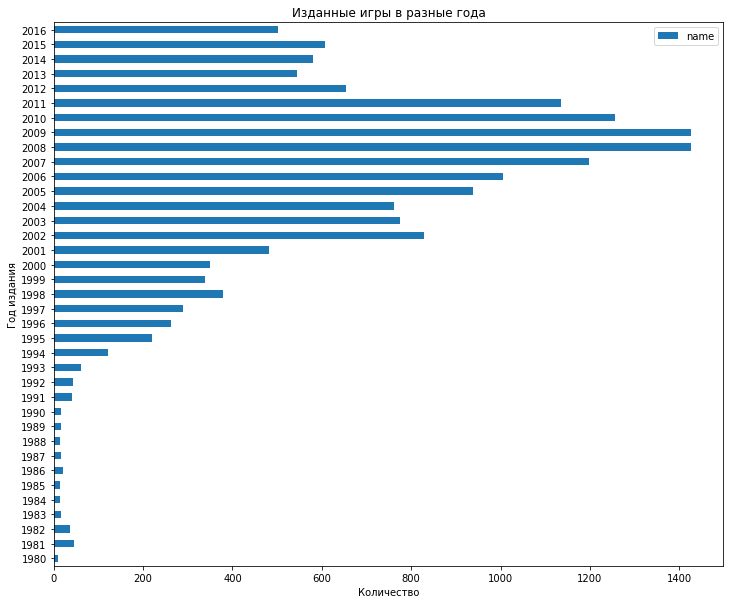

In [20]:
games.plot(kind='barh', figsize=(12, 10))
plt.xlabel('Количество')
plt.ylabel('Год издания')
plt.title('Изданные игры в разные года');

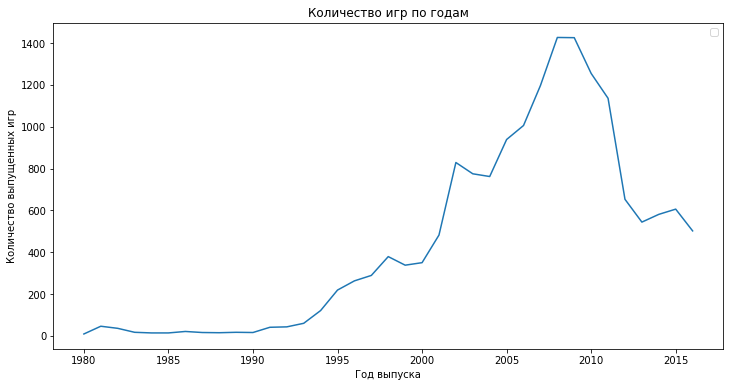

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=games)
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('');

Исходя из полученных данных, можно сказать, что в период с 81 по 90 годы был небольшой спад, что не должно никого удивлять.
И далее производство игр стало расти.

По сути все данные здесь использовать необязательно, но я считаю, что это очень показательно, что в какой-то момент произошел невероятный скачок вперед.
В 1993 было выпущено 62 игры, а годом позже почти в два раза больше и это кол-во росло с каждым годом.

2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

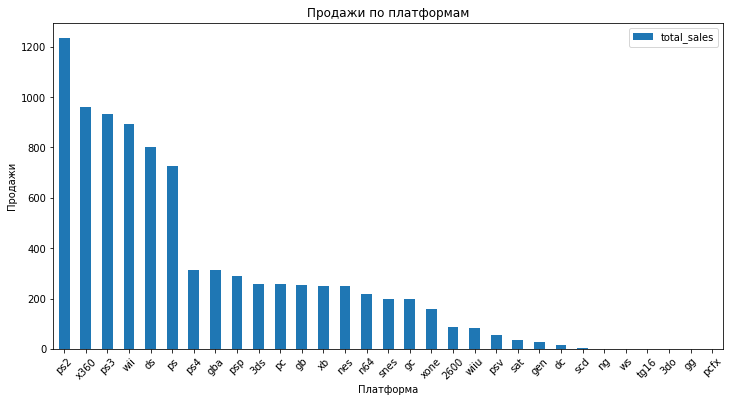

In [22]:
platforms = df_clean.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms.plot(kind='bar',figsize=(12, 6), rot=45)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам');

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


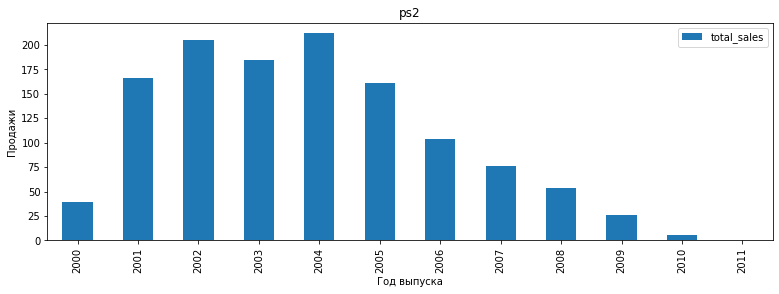

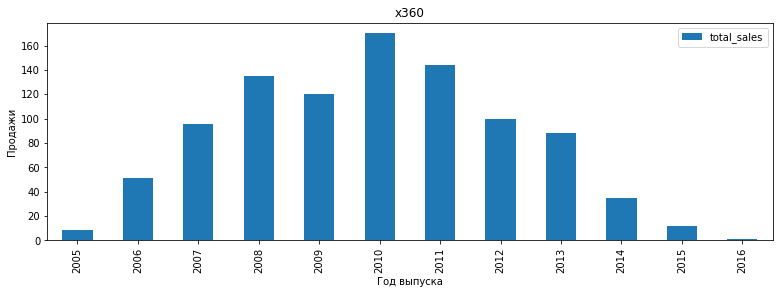

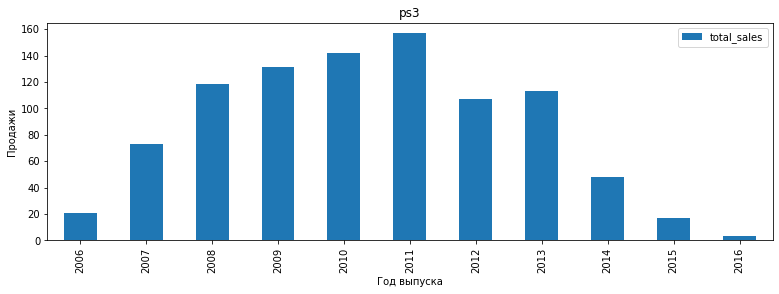

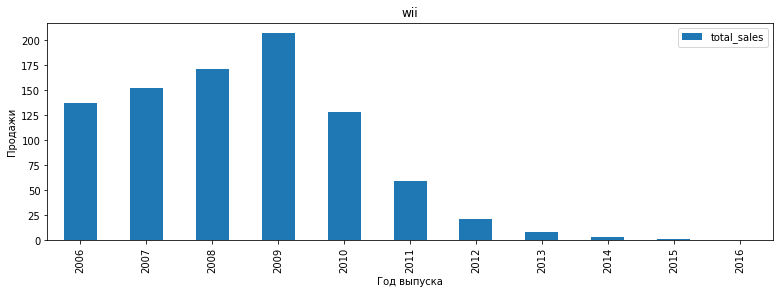

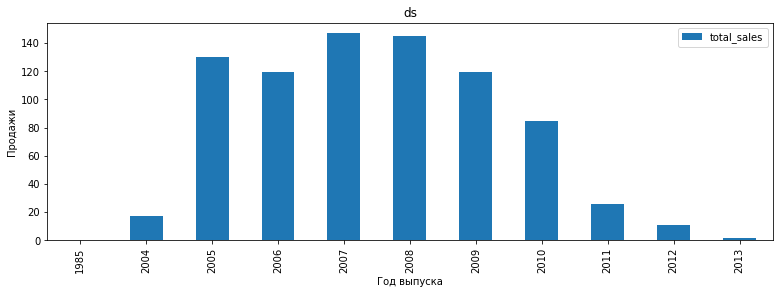

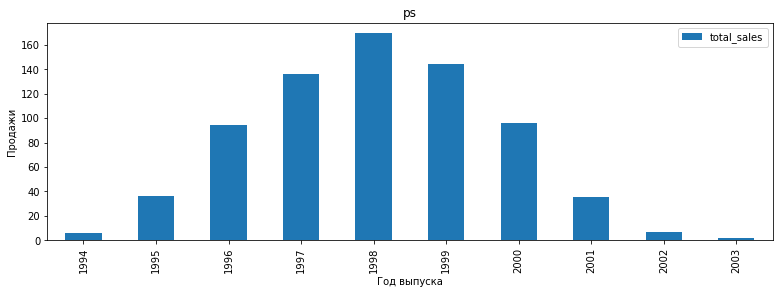

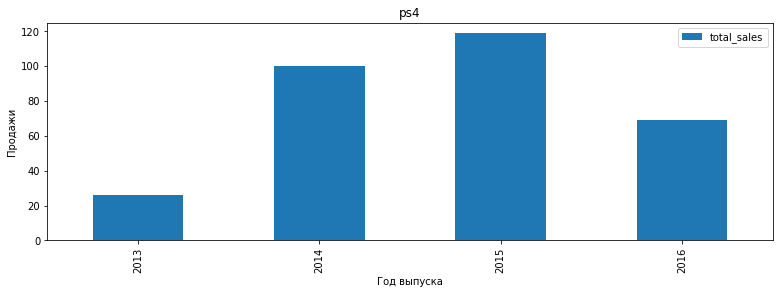

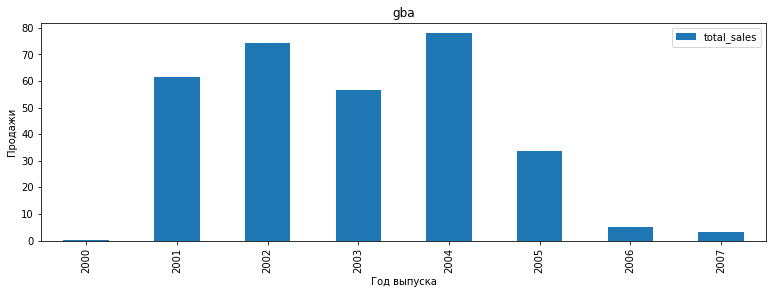

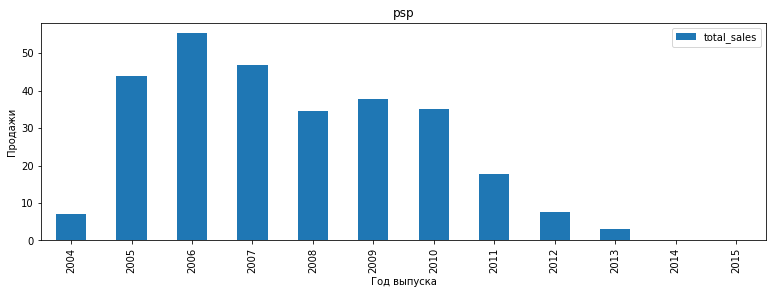

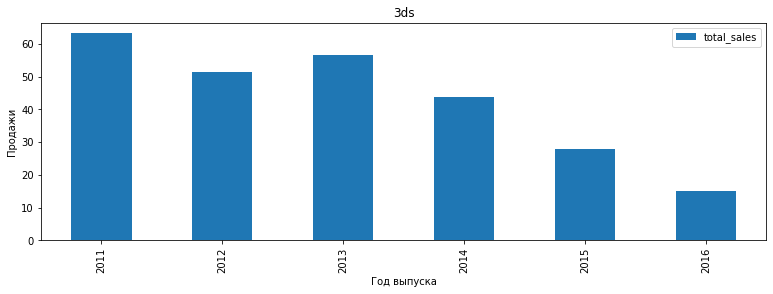

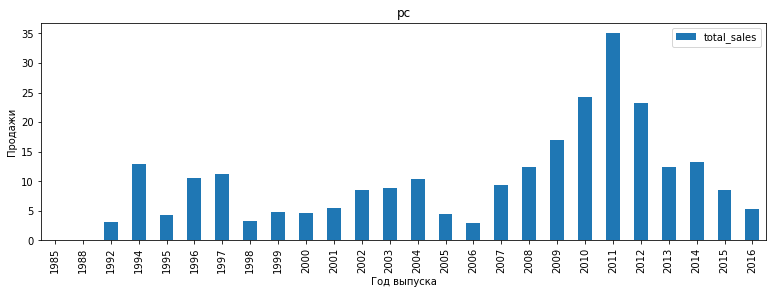

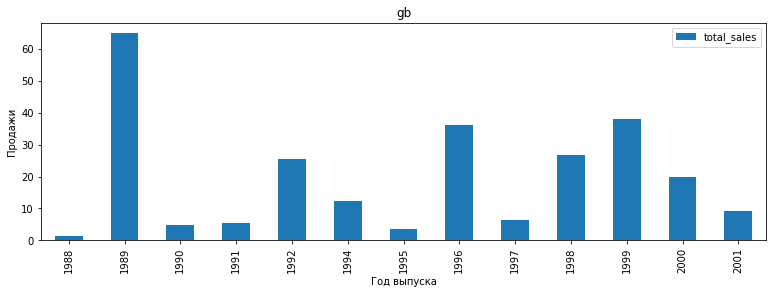

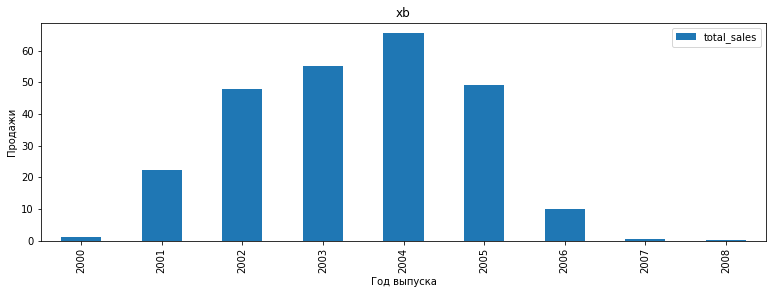

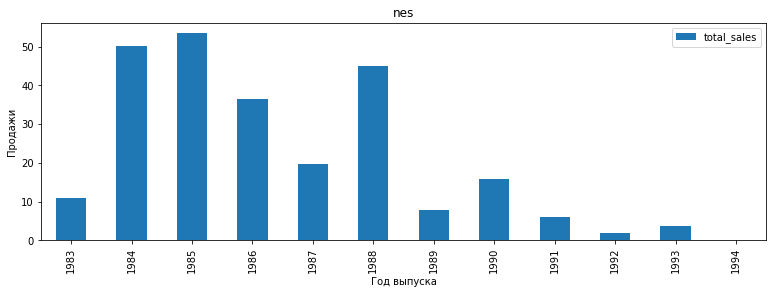

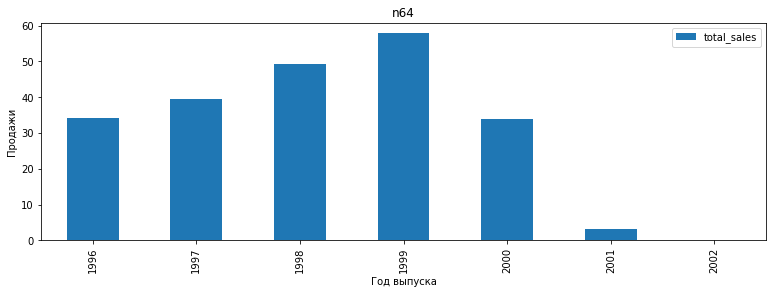

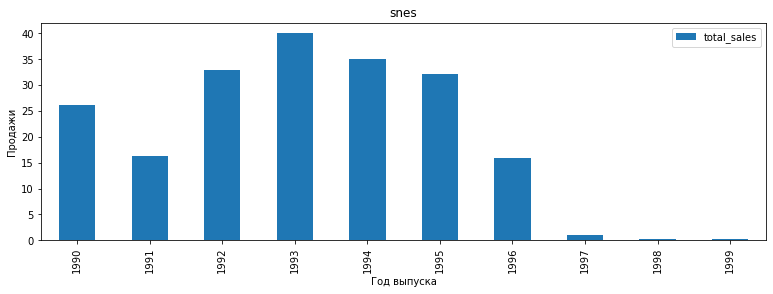

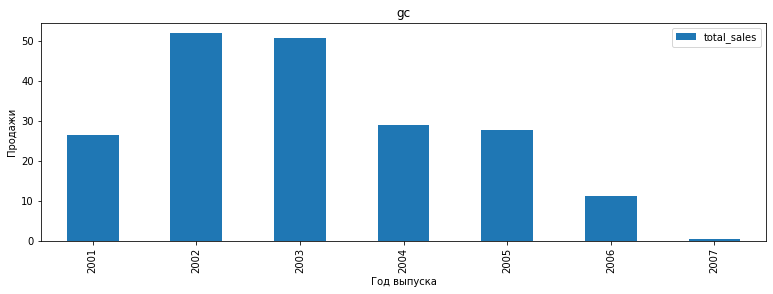

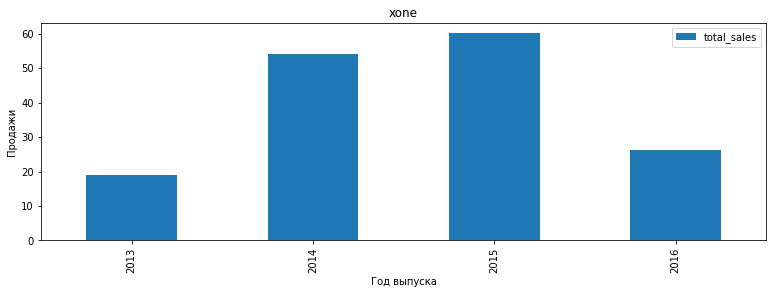

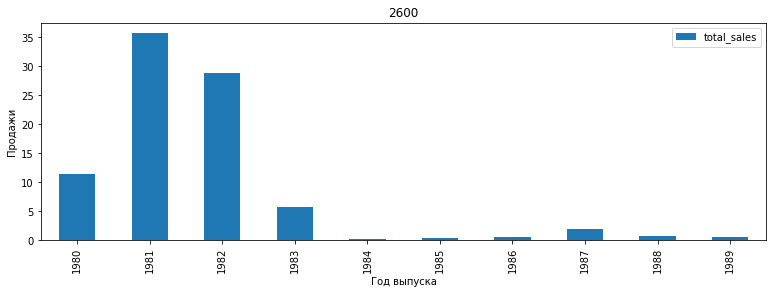

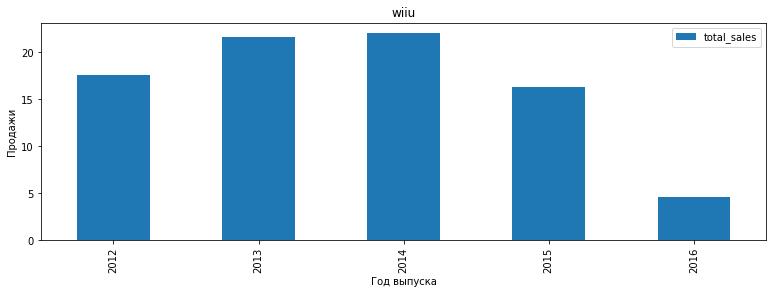

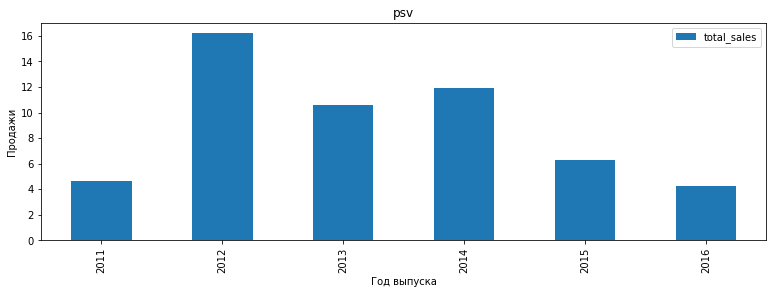

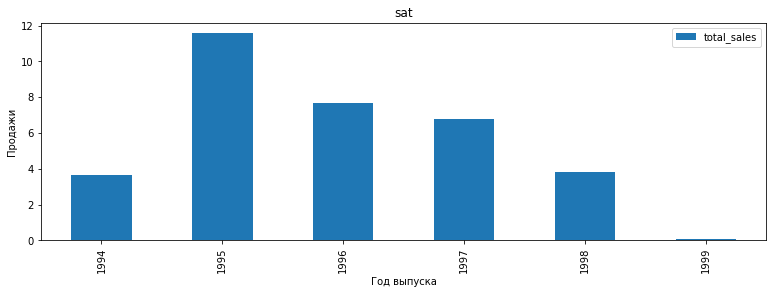

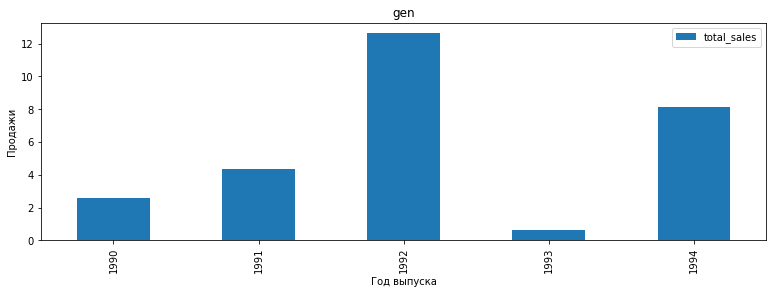

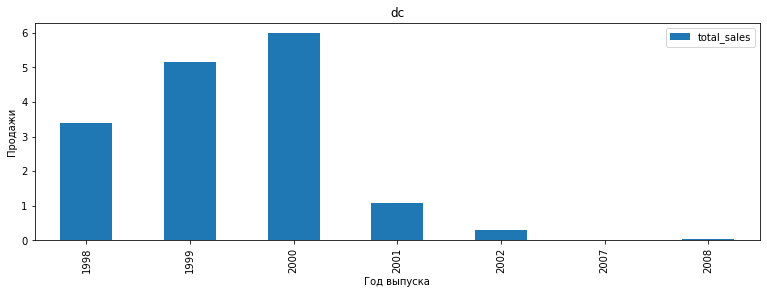

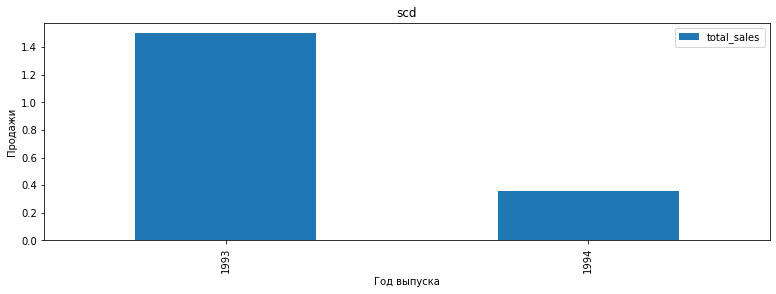

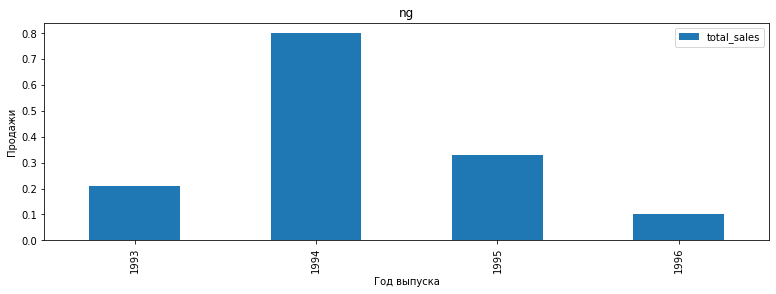

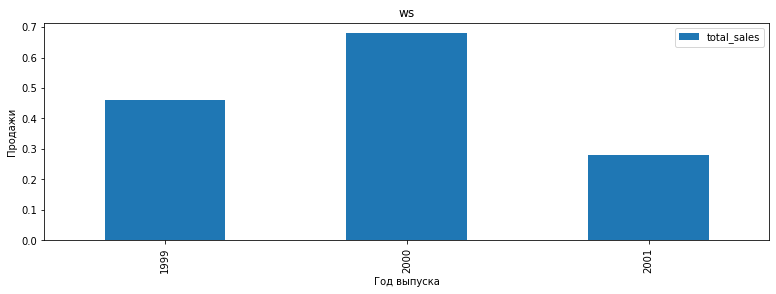

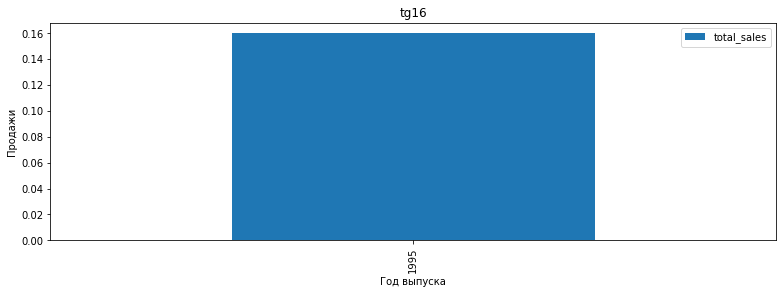

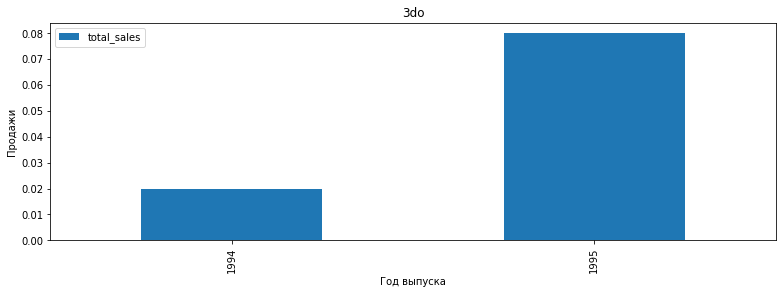

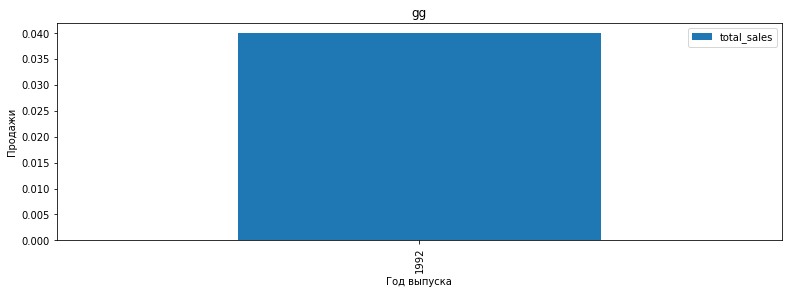

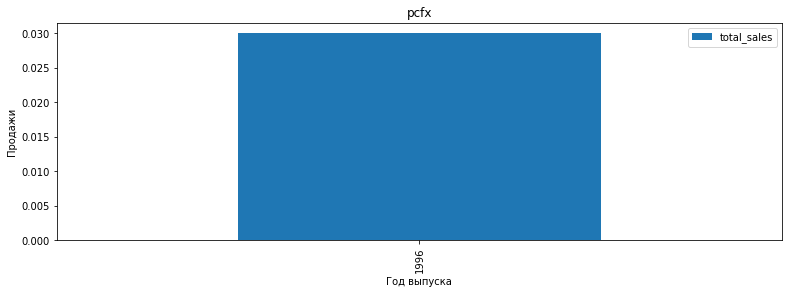

In [23]:
all_plats = platforms.reset_index()
list_plats = all_plats['platform'].unique()
for plat in list_plats:
    df_clean[df_clean['platform'] == plat].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
    plt.title(plat)
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи');
top = list_plats[:6] 

In [24]:
top

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'], dtype=object)

Исходя из построенных графиков можно сказать, что платформы живут поколенями в 10 лет, то есть, появляются, растут и затем опускаются на промежутке  в 10 лет

3) Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [25]:
plats_years = df_clean.pivot_table(index='platform', values='year_of_release', aggfunc='max')
p = plats_years[plats_years['year_of_release'] > 2014]
df_plats_actual = df_clean[df_clean['year_of_release'] > 2014]
df_plats_actual
df_plats_actual['platform'].unique()

array(['ps4', 'xone', '3ds', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv',
       'psp'], dtype=object)

Поправил, взял как больше 2014

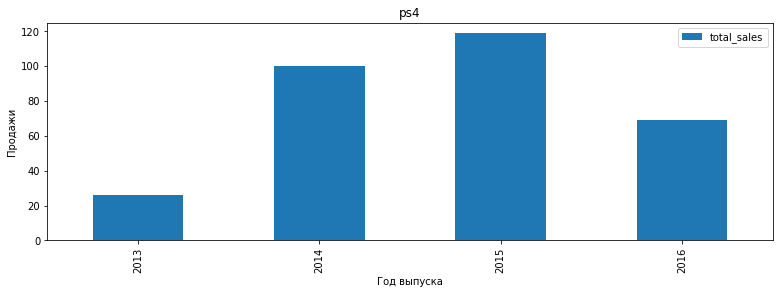

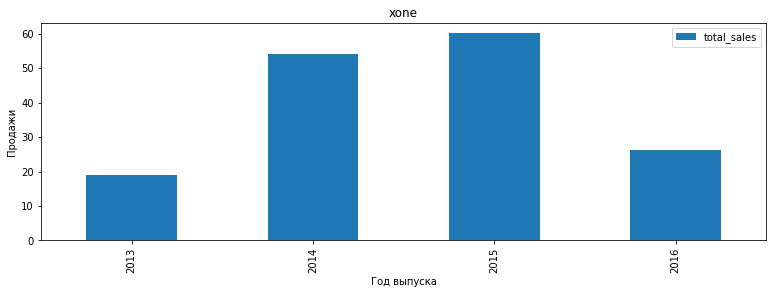

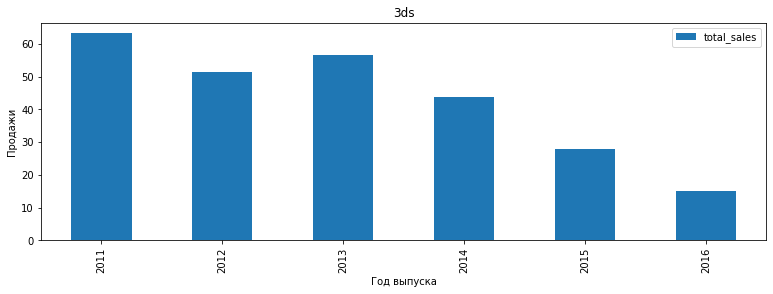

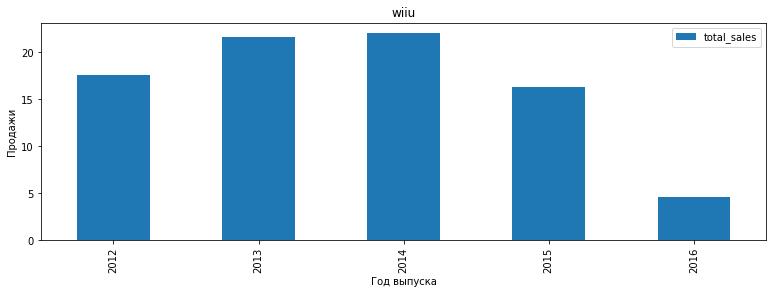

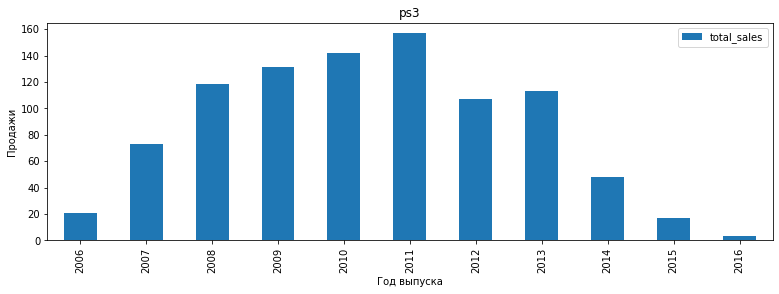

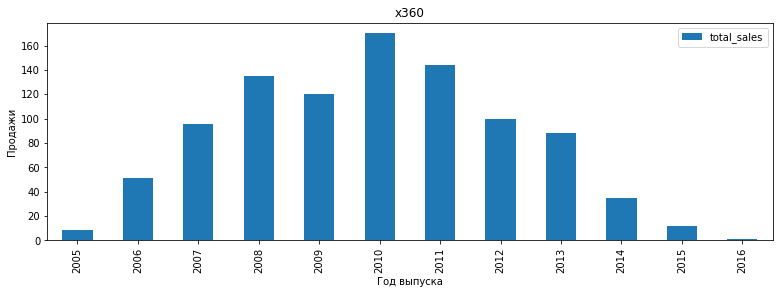

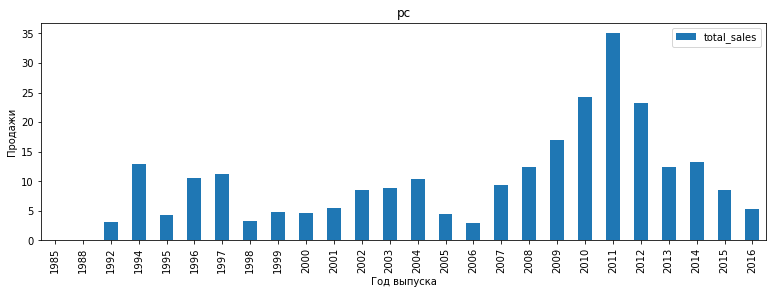

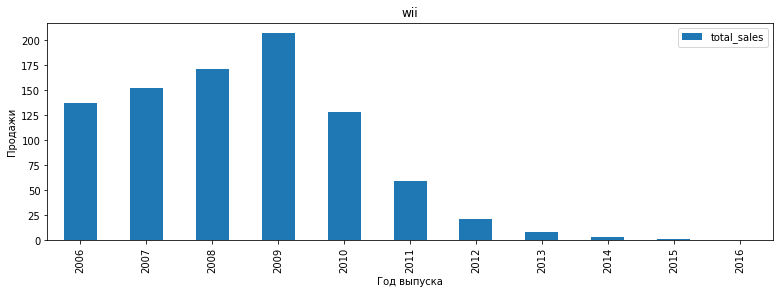

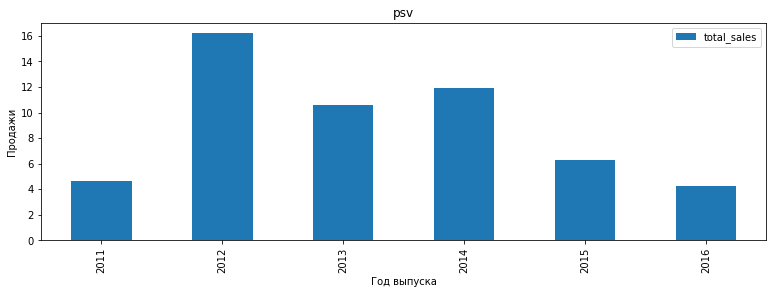

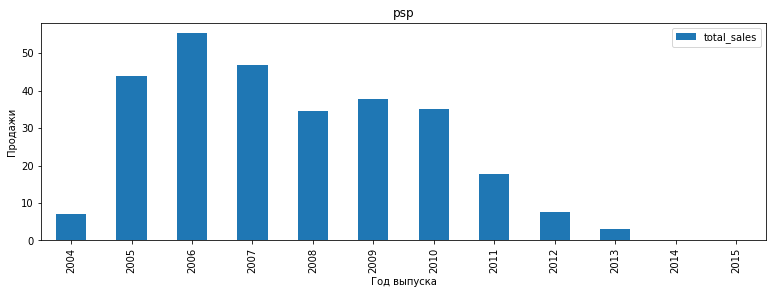

In [26]:
for p in df_plats_actual['platform'].unique():
    df_clean[df_clean['platform'] == p].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
    plt.title(p)
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи');

ps4, 3ds, xone, wiiu, pc, psv - именно эти платформы являются наиболее живыми и актуальными к 2016 году

In [27]:
actual_plats = ['ps4', '3ds', 'xone', 'wiiu', 'pc', 'psv']
plats = df_clean[df_clean['platform'].isin(actual_plats)]
plats['total_sales'].describe()

count    2684.000000
mean        0.418417
std         1.074664
min         0.010000
25%         0.030000
50%         0.085000
75%         0.310000
max        14.630000
Name: total_sales, dtype: float64

In [28]:
plats = plats[plats['total_sales']<1.31]
plats

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1499,the witcher 3: wild hunt,xone,2015,role-playing,0.69,0.50,0.00,0.11,91.0,9.2,m,1.30
1509,yoshi's woolly world,wiiu,2015,platform,0.62,0.47,0.11,0.10,78.0,8.5,e,1.30
1515,assassin's creed syndicate,xone,2015,action,0.62,0.56,0.00,0.11,78.0,6.1,m,1.29
1529,dying light,xone,2015,action,0.86,0.30,0.01,0.12,74.0,7.8,m,1.29
1530,fallout 4,pc,2015,role-playing,0.51,0.67,0.00,0.10,84.0,5.4,m,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16705,15 days,pc,2009,adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


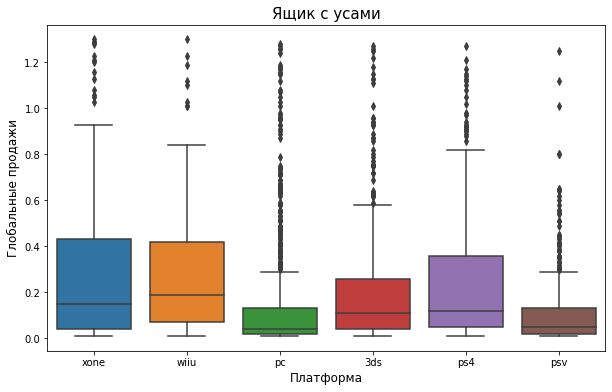

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=plats, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Пойдем по порядку.

- Xone. На данной платформе самый большой межквартильынй размах. Исходя из значения медианы расположенной примерно на отметке 0.17 - 0.18 можно сказать, что у данной платформы достаточно большое кол-во продаж. Также на взгляд у данной платформы самое большое значение Q3 + 1.5 IQR (межквартильный размах). Что говорит о большом числе продаж в различные периоды. Выбросы средние относительно других графиков, но кажется, что они весьма стабильны, так как на графике точки кучны.

- wiiu. "Коробка" данной платформы чуть меньше, чем у xone, медиана также располагается чуть-чуть выше. В среднем у данной платформы продажи достигают 0.2 миллиона, что является наибольшим значением из всех представленных платформ. Q3 + 1.5 IQR чуть меньше, чем у предыдущей платформы, и выбросы встречаются реже, скажем так, это стабильная платформа, которая редко "взрывается"

- pc. Обладает самой маленькой медианой продаж, самым маленьким межквартильным размахом и одним из самых значением Q3 + 1.5 IQR, однако у данной платформы большие выбросы в данных, и в отличие от предыдущих платформ, периодами "взлетает" и врывается на рынок с большим количеством продаж.

- 3ds. Медиана данной платформы находится на примерно том же уровне, что и у xone, межквартильный размах также невелик. Но также, как и предыдущая платформа врывается со своими продажами, разброс менее кучный, однако он присутствует.

- ps4. У этой плафтормы медиана на том же уровне, что и у предыдущей, также чуть меньше, чем у xone. По своему межквартильному размаху входит в тройку платформ по этому параметру. Значение Q3 + 1.5 IQR на том же уровне, что и у wiiu, но обладает большим числом выбросов, которые по своим значениям чуть меньше, чем у всех предыдущих платформ.

- psv. Данная платформа на мой взгляд является самой плачевной, медиана низкая, но не ниже, чем у pc, значение Q3 + 1.5 IQR также близко к pc, однако выбросы у данной платформы плачевны, в отличие от других платформ, psv не так часто и не так сильно врывается в гонку по продажам, межквартильный размах также не большой, что говорит о небольших продажах в среднем.

Исходя из всего вышесказанного лучше всех на плаву держатся именно xone, wiiu и ps4. У данных платформ хорошие показатели, они явно неплохо создают конкуренцию друг для друга. Скорее всего явлются стабильно хорошими продавцами. Однако на их фоне также выделяются pc, 3ds, которые живут благодаря своим "выбросам" в продажах, но не являются из-за этого стабильными и я не думаю, что они являются хорошими конкурентами для других

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [30]:
def task(platform):
    plat = df_clean[df_clean['platform'] == platform]
    
    corr_critic = plat['total_sales'].corr(plat['critic_score'])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x=plat['total_sales'], y=plat['critic_score'])
    plt.xlabel('total_sales')
    plt.ylabel('critic_score')
    plt.title(f'Correlation between total sales of {platform} and critic score is {corr_critic}')
    
    corr_user = plat['total_sales'].corr(plat['user_score'])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x=plat['total_sales'], y=plat['user_score'])
    plt.xlabel('total_sales')
    plt.ylabel('user_score')
    plt.title(f'Correlation between {platform} and user score is {corr_user}')
    

исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

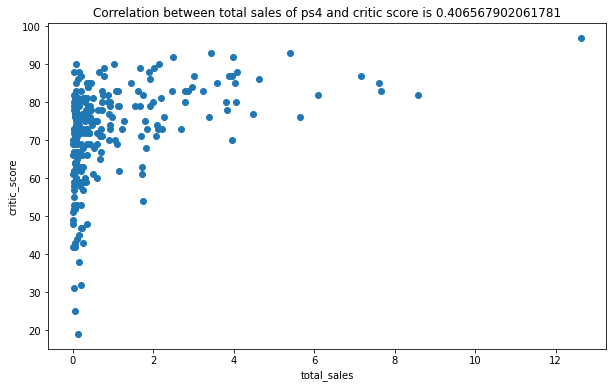

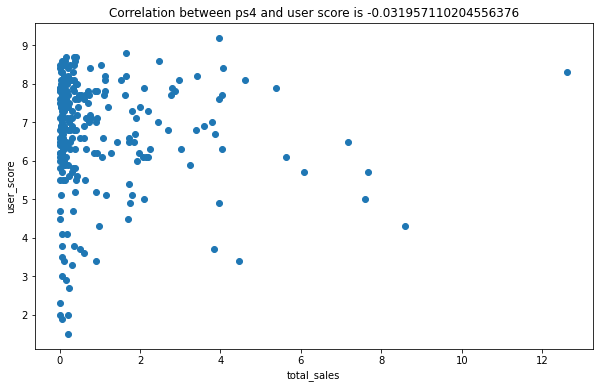

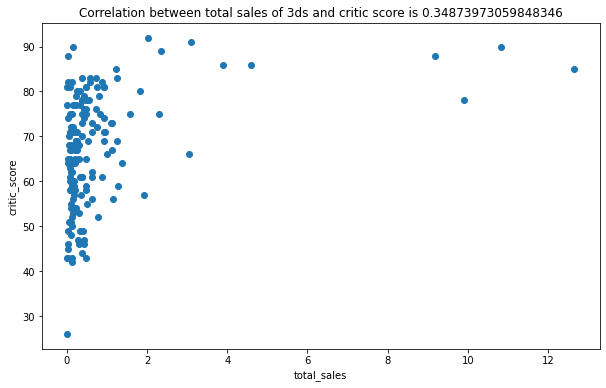

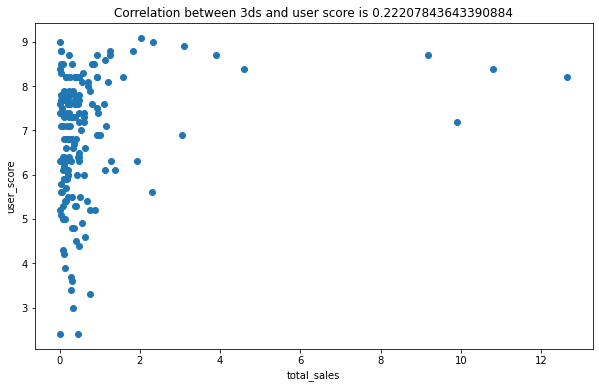

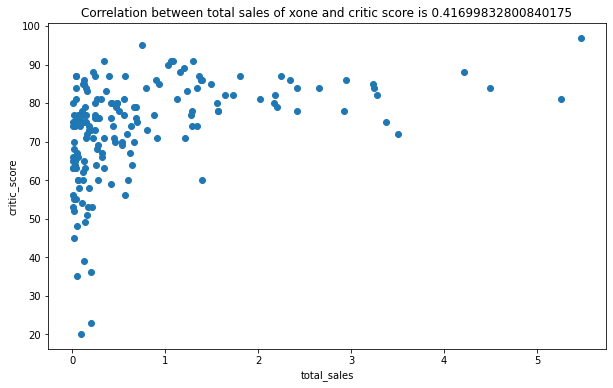

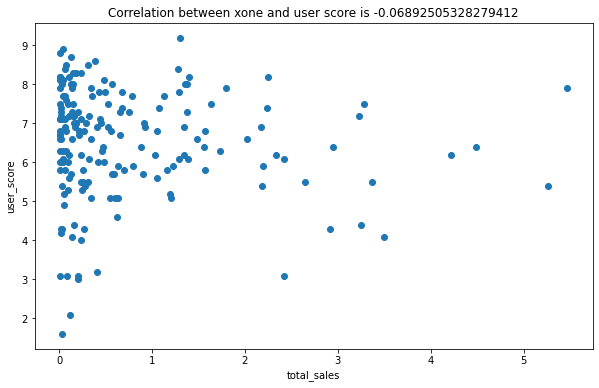

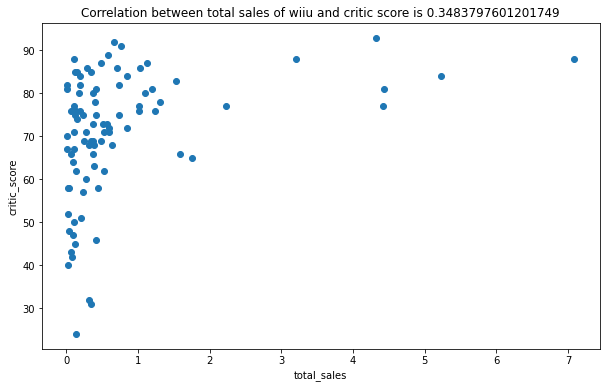

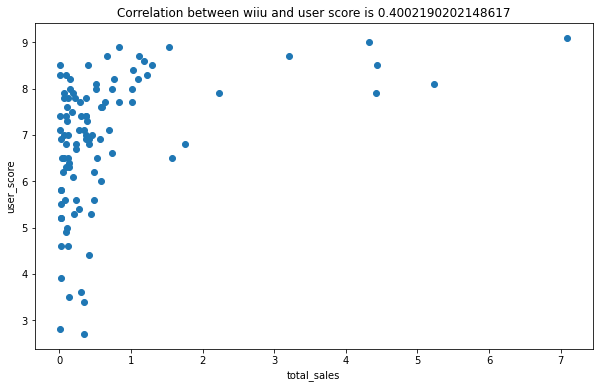

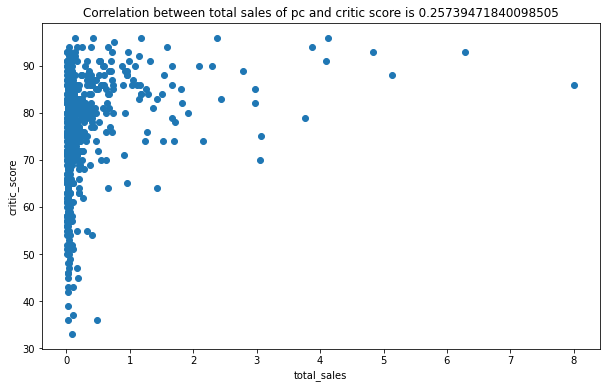

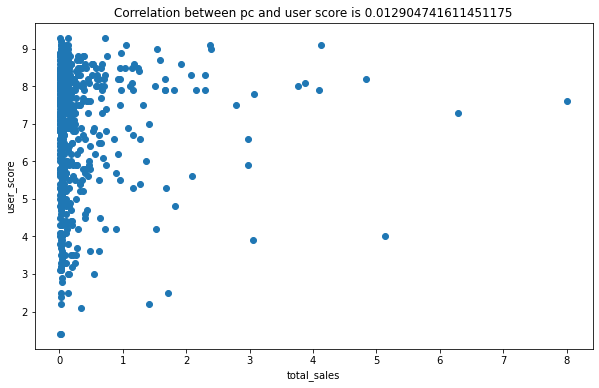

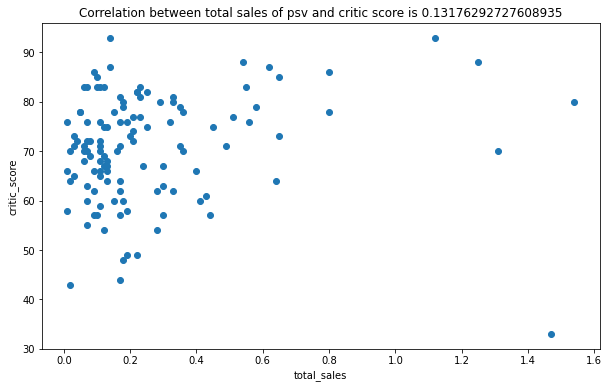

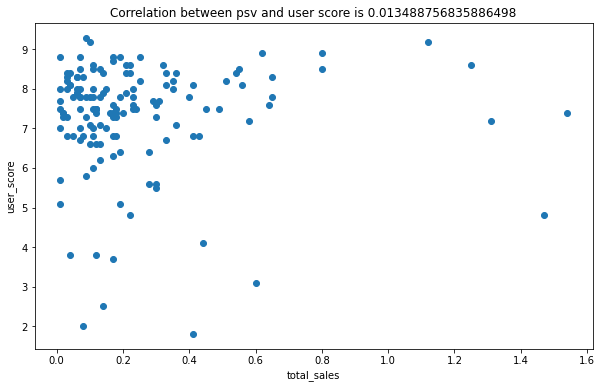

In [37]:
for plat in actual_plats:
    task(plat)

- Платформа ps4

Исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

- Платформа 3ds

Исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

- Платформа xone

Исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

- Платформа wiiu

Исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Зависимость продаж от оценок пользователей есть, но как и с оценкой критиков она небольшая, однако пока что эта первая платформа, которая показывает, что ее продажи зависят от оценок пользователей, это видно и по графику и по значению корреляции.

- Платформа pc

Исходя из графиков видно, что зависимости продаж от отзывов критиков нет. Значение корреляции также это подтверждает.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

- Платформа psv

Исходя из графиков видно, что также, как и с предыдущей платформы зависимости никакой как таковой нет. Значение корреляции также это подтверждает.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

Промежуточный вывод. Прямой ярко выраженной зависимости между показателями нет. Однако чаще проявляется небольшая, слабая, прямая зависимость между оценкой критиков и общими продажами. Только у некоторых платформ есть взаимосвязь между продажами и отзывами пользователей.

 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

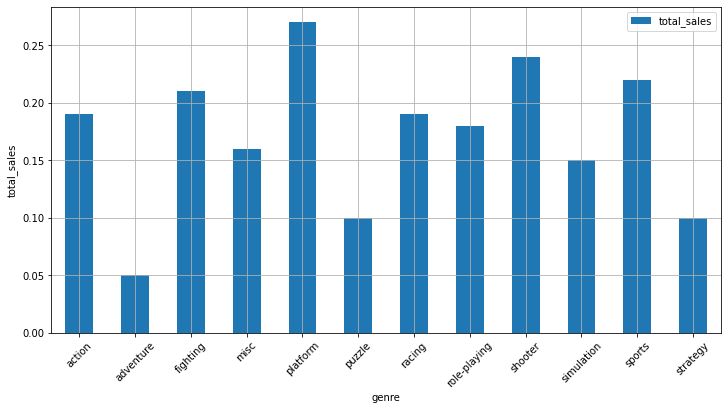

In [39]:
genre = df_clean.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre.plot(kind='bar', figsize=(12,6), rot=45)
plt.grid(True)
plt.ylabel('total_sales');

Исходя из полученного графика видно, что наибольшие продажи у игр с жанром action и sports, чуть меньше у shooter и role-playing игр. Я считаю, что это отражает факт заинтересованности людей в более "активных" играх, где игрок получает больше всего удовольствия. Намного меньше людей, играющих в стратегии, пазлы или приключения, возможно это связно с тухлостью и неким однообразием геймплея.

## Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [40]:
def portret(location):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for column, ax in zip(list(['genre', 'platform', 'rating']), axes):
        table = df_clean.pivot_table(index=column, values=location, aggfunc='sum').sort_values(by=location, ascending=False).reset_index().head()
        display(table)
        
        sns.barplot(data=table, x=column, y=location, ax=ax)
        fig.suptitle('title', fontsize=15)
        
plt.show()
sns.set()

Построение графиков и сводных таблиц одинаковы для всех регионов, поэтому вынес это все в функцию, нашел в интернете метод subplots, который позволяет строить несколько графиков на одном изображении, то есть на fig. Как я понимаю каждый график это рисунок на объекте класса Figure и по умолчанию мы строим один график на не нем, а данный метод позволяет строить несколько графиков. Функция zip "Попарно" сопоставляет данные из одного массива и из другого, условно идет цикл и берутся попарно элементы с 0 индексом, с 1 и так далее. параметры 1 и 3 это количество строк и столбцов соответсвтенно. Здесь попарно берется элемент из списка колонок (жанр, платформа, рейтинг) и 1, 2, 3 графики, метод принт не подходит для вывода таблиц на экран, существует метод display. Ну и решил посмотерть как строятся графики через библиотеку seaborn. Очень надеюсь что далее в курсе еще будут рассмотрены способы построения и работы с графиками так как такие функции очень сложны для восприятия и хочется видеть понятную теорию.

,genre,na_sales
0,action,863.17
1,sports,671.20
2,shooter,584.83
3,platform,444.44
4,misc,399.57


,platform,na_sales
0,x360,595.74
1,ps2,572.92
2,wii,486.87
3,ps3,390.13
4,ds,380.31


,rating,na_sales
0,e,1274.24
1,t,747.60
2,m,742.89
3,e10+,345.50
4,k-a,2.56


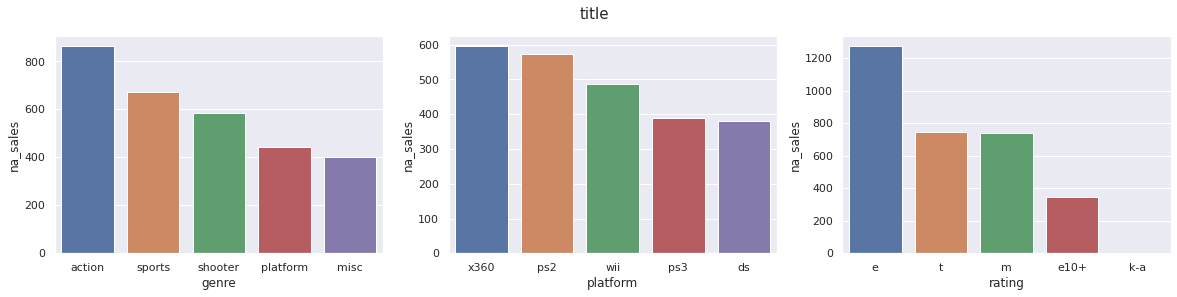

In [41]:
portret('na_sales')

Покупатели из Северной Америки намного чаще выбирают игры из категории action, на втором месте с небольшим отрывом от шутеров (shooter) расположились игры из категории спортивные (sports) далее с большим отставанием игры-платформеры и музыкальные.

Самыми популярными платформами оказались x360 и ps2 по ним наибольшие показатели продаж.

Наибольшее кол-во продаж с большим отрывом наблюдается среди игр категории e, то есть игры для всех. Как я говорил выше намного проще продать игру, которая подходит для людей любого возраста.

,genre,eu_sales
0,action,510.99
1,sports,371.33
2,shooter,314.52
3,racing,234.49
4,misc,210.60


,platform,eu_sales
0,ps2,332.63
1,ps3,327.21
2,x360,268.32
3,wii,258.32
4,ps,212.39


,rating,eu_sales
0,e,703.87
1,m,480.00
2,t,421.79
3,e10+,183.35
4,ao,0.61


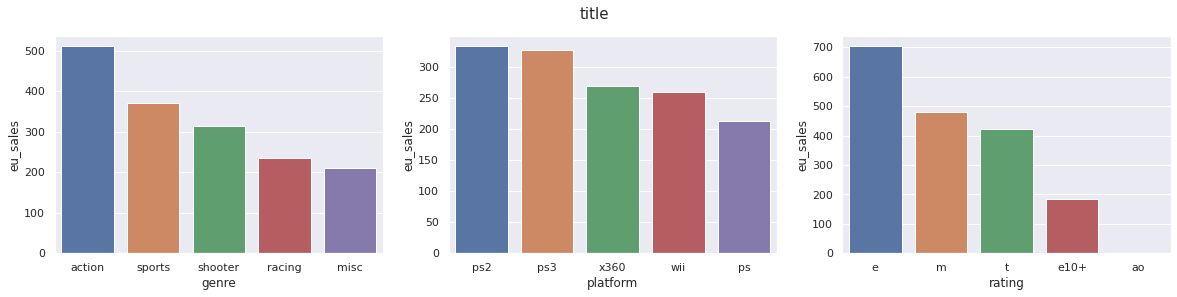

In [42]:
portret('eu_sales')

Покупатели из Европы намного чаще выбирают игры из категории action, на втором месте с небольшим отрывом от шутеров (shooter) расположились игры из категории спортивные (sports) далее с большим отставанием игры-гонки и музыкальные.

Самыми популярными платформами оказались ps2 и ps3 по ним наибольшие показатели продаж.

Наибольшее кол-во продаж с большим отрывом наблюдается среди игр категории e, то есть игры для всех. Как я говорил выше намного проще продать игру, которая подходит для людей любого возраста.

,genre,jp_sales
0,role-playing,353.39
1,action,160.14
2,sports,134.93
3,platform,130.71
4,misc,107.02


,platform,jp_sales
0,ds,175.02
1,ps,139.78
2,ps2,137.54
3,snes,116.55
4,3ds,100.62


,rating,jp_sales
0,e,197.96
1,t,150.70
2,m,63.58
3,e10+,40.20
4,k-a,1.46


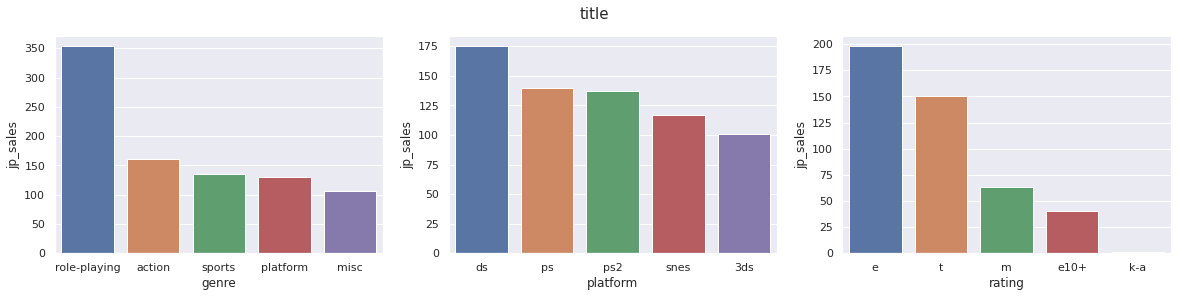

In [43]:
portret('jp_sales')

Покупатели из Японии намного чаще выбирают игры из категории role-playing, на втором месте с небольшим отрывом от спортивных (sports) расположились игры из категории action.

Самой популярной платформой оказалась ds. ps2, ps по своим продажам почти идентичны.

Наибольшее кол-во продаж с большим отрывом наблюдается среди игр категории e, то есть игры для всех. Как я говорил выше намного проще продать игру, которая подходит для людей любого возраста.

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Чтобы проверить данные гипотезы воспользуемся критерием стьюдента, для проверки равенства средних двух ген совокупностей.

Проверка осуществляется методом ttest_ind из библиотеки scipy. 

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [44]:
pc_ur = df_clean[(df_clean['platform']== 'pc') & (df_clean['user_score'])]['user_score']
x_ur = df_clean[(df_clean['platform'] == 'xone') & (df_clean['user_score'])]['user_score']

alpha = 0.05
results = st.ttest_ind(x_ur, pc_ur, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [45]:
a_ur = df_clean[(df_clean['genre'] == 'action')]['user_score'].dropna()
sp_ur = df_clean[(df_clean['genre'] == 'sports')]['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(a_ur, sp_ur, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


Из полученных данных видно, что средние пользовательские рейтинги платформ Xbox One и PC не равны. Поставленную нами нулевую гипотезу мы отвергаем.

Во втором задании нулевую гипотез мы отвергнуть не можем. И можем смело предполагать, что средние рейтинги игр жанров action и sports равны

## Общий Вывод

### Вывод 1 этап

В самом начале проекта был проведен первичный анализ данных, ниже представлены сухие данные бе зкакой-либо оброботки, даже на этом этапе были видны проблемы, пропуски и ошибки.

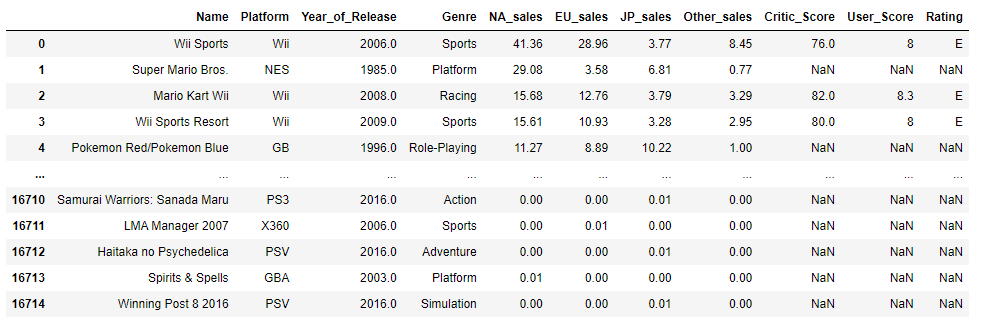

После изучения типов данных стало ясно с каким столбцами придется работать, что менять, что оставлять

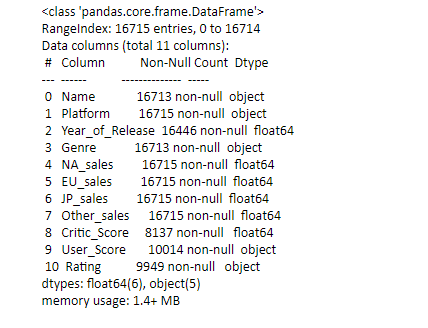

Ниже представленая описательная статистика для всех столбцов 

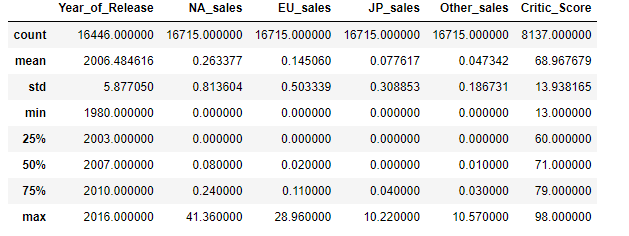

И дополнительно таблицы с долями  пропусков в колонках

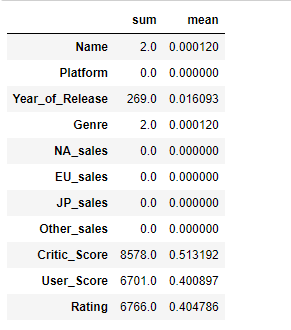

### Вывод 2 этап

В данном блоке были изменены типы данных в столбцах Year_of_release, Name, Genre, User_score.
Год сделал целочисленным типом, имена остались строками, но теперь абслютно все значения, не только в Name колонке стали с маленькой буквы, что могло помочь при поиске дубликатов, которых не было обнаружено.

В столбце user_score значение tbd заменил на NaN, так как эти значения по сути идентичны.

Значения времени были утеряны и заполнить их как-либо сложно.

Остальные пропуски я оставил, как есть, проставить рейтинг судя по жанру решение не лучшее, не всегда игры из жанра Fighting являются кровавыми и только для взрослой аудитории. Также я не могу заполнить искусственными значениями отзывы от реальных людей.

Никаких дубликатов обнаружено не было, очень часто в Name  игр встречались похожие названия, однако это всего лишь разные части каждой игры.

Пропуски могут быть связаны с различными факторами рассмотрим каждый столбец, где были обнаружены пропуски.

- Name. В данном столбце пропуск названия игры скорее всего мог быть связан с неосторожным заполнением или чтением данных. Также нельзя отрицать возможную ошибку в системе. Возможно был обнаружен недопустимый символ для названия игры, ни одна игра например не начинается с символа нижнего подчеркивания. 

- Genre. Здесь ошибки скорее всего те же, что и в столбце Name. У игр всегда есть категория, которую определяют авторы самой игры. 

- Critic score. Здесь все достаточно просто, игр великое множество, они начали выпускаться довольно давно, а потребность в оценке критиков появилась сильно позже, когда людям действительно стало важно мнение экспертов. Все чаще стали появляться порой действительно дорогие игры, и для многих такие покупки могут являться чем-то очень важным и каждый хочет знать, на что они тратят деньги.

- User score. В данном блоке пропуски могут быть связаны с тем, что игроки просто купили и скачали игру, но отзывов на нее ни через день, ни через год не оставили. Такое часто встречается не только в игровой индустрии, зачастую в игровых магазинах нет частой рассылки с целью получить от клиента отзыв по игре. Здесь всему виной человеческий фактор.

- Rating. Тоже, что и с Critic score, оценкой рейтингов занимаются специальные люди и компании, автор игры может осавить определенный рейтинг, однако, я считаю, для авторов это не очень выгодно, игру становится продать тяжелее, если она подходит не всем, особенно если это игра только дял взрослой аудитории.


Вот так стали выглядеть данные после 2 этапа.

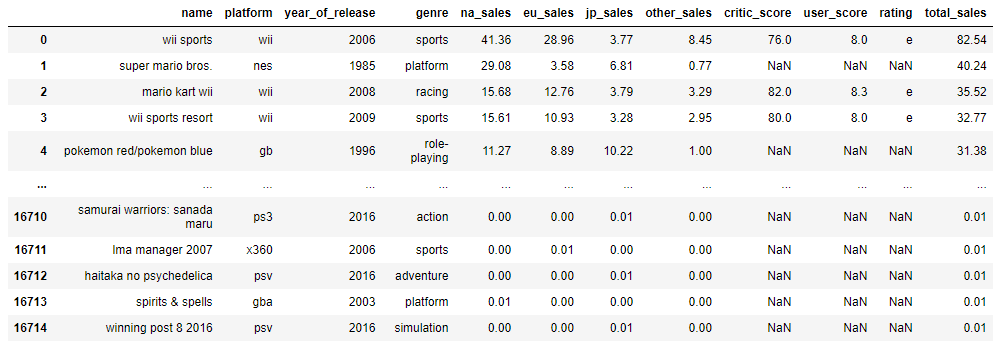

### Вывод 3 этап

Ниже представлены графики, показывающие как именно менялось кол-во изданных игр по годам, начиная от 1980 до 2016. По нима видно, что после 1991 кол-во начало расти и поднималось выше и выше, однако после 2011 пошел спад и игры начали выпускать равносилно 2001-2005 годам.

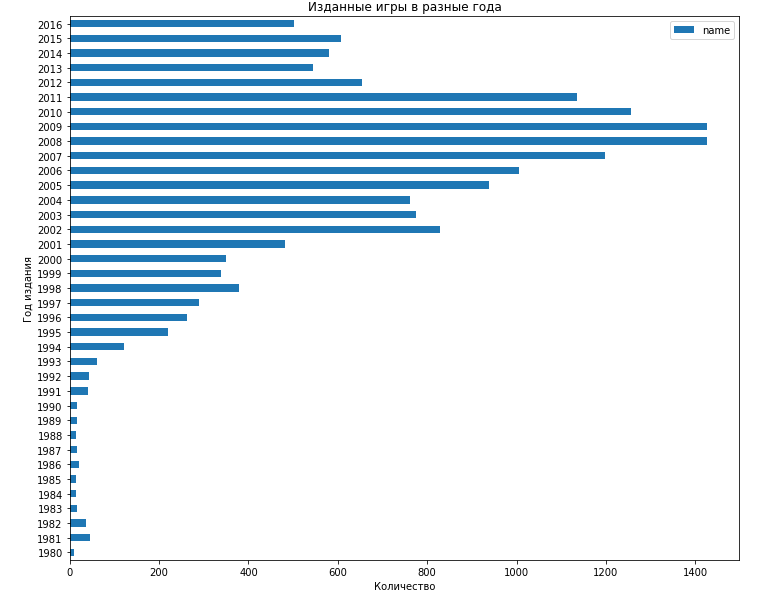

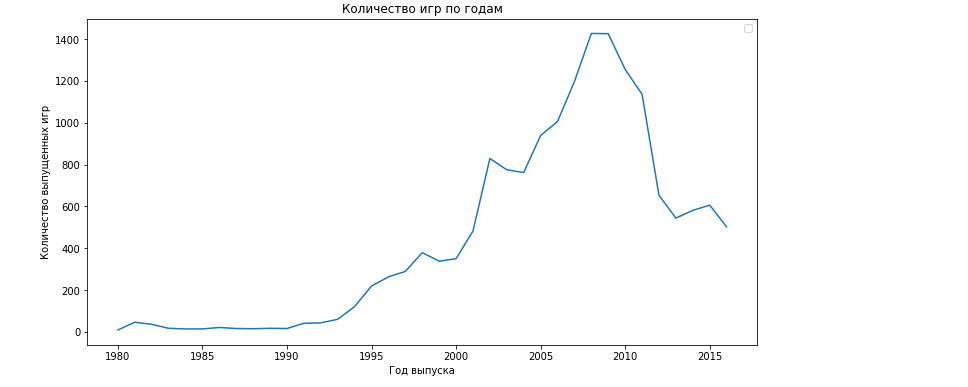

На графике ниже прдеставлены все платформы и продажи за ним за все время. Видно, что платформа ps2 весьма сильно обгоняет своих оппонетнтов и далее следующий 5 платформ находятся примерно на одном и том же уровне, составляя конкуренцию.

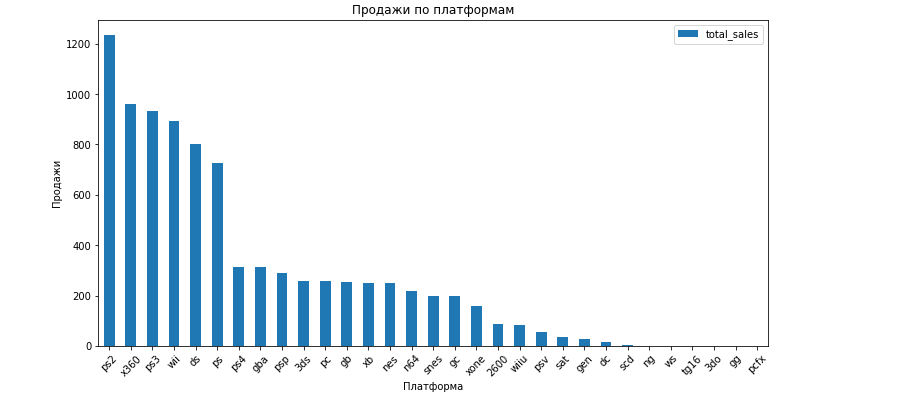

Пойдем по порядку.

- Xone. На данной платформе самый большой межквартильынй размах. Исходя из значения медианы расположенной примерно на отметке 0.17 - 0.18 можно сказать, что у данной платформы достаточно большое кол-во продаж. Также на взгляд у данной платформы самое большое значение Q3 + 1.5 IQR (межквартильный размах). Что говорит о большом числе продаж в различные периоды. Выбросы средние относительно других графиков, но кажется, что они весьма стабильны, так как на графике точки кучны.

- wiiu. "Коробка" данной платформы чуть меньше, чем у xone, медиана также располагается чуть-чуть выше. В среднем у данной платформы продажи достигают 0.2 миллиона, что является наибольшим значением из всех представленных платформ. Q3 + 1.5 IQR чуть меньше, чем у предыдущей платформы, и выбросы встречаются реже, скажем так, это стабильная платформа, которая редко "взрывается"

- pc. Обладает самой маленькой медианой продаж, самым маленьким межквартильным размахом и одним из самых значением Q3 + 1.5 IQR, однако у данной платформы большие выбросы в данных, и в отличие от предыдущих платформ, периодами "взлетает" и врывается на рынок с большим количеством продаж.

- 3ds. Медиана данной платформы находится на примерно том же уровне, что и у xone, межквартильный размах также невелик. Но также, как и предыдущая платформа врывается со своими продажами, разброс менее кучный, однако он присутствует.

- ps4. У этой плафтормы медиана на том же уровне, что и у предыдущей, также чуть меньше, чем у xone. По своему межквартильному размаху входит в тройку платформ по этому параметру. Значение Q3 + 1.5 IQR на том же уровне, что и у wiiu, но обладает большим числом выбросов, которые по своим значениям чуть меньше, чем у всех предыдущих платформ.

- psv. Данная платформа на мой взгляд является самой плачевной, медиана низкая, но не ниже, чем у pc, значение Q3 + 1.5 IQR также близко к pc, однако выбросы у данной платформы плачевны, в отличие от других платформ, psv не так часто и не так сильно врывается в гонку по продажам, межквартильный размах также не большой, что говорит о небольших продажах в среднем.

Исходя из всего вышесказанного лучше всех на плаву держатся именно xone, wiiu и ps4. У данных платформ хорошие показатели, они явно неплохо создают конкуренцию друг для друга. Скорее всего явлются стабильно хорошими продавцами. Однако на их фоне также выделяются pc, 3ds, которые живут благодаря своим "выбросам" в продажах, но не являются из-за этого стабильными и я не думаю, что они являются хорошими конкурентами для других

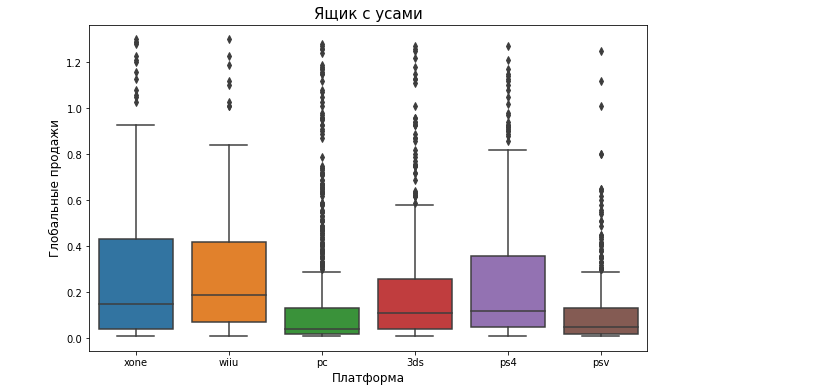

- Платформа ps4

Исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

- Платформа 3ds

Исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

- Платформа xone

Исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

- Платформа wiiu

Исходя из графиков видно, небольшая зависимость продаж от отзывов критиков есть. Значение корреляции также это подтверждает, зависимость есть, но она слабо выражена.

Зависимость продаж от оценок пользователей есть, но как и с оценкой критиков она небольшая, однако пока что эта первая платформа, которая показывает, что ее продажи зависят от оценок пользователей, это видно и по графику и по значению корреляции.

- Платформа pc

Исходя из графиков видно, что зависимости продаж от отзывов критиков нет. Значение корреляции также это подтверждает.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

- Платформа psv

Исходя из графиков видно, что также, как и с предыдущей платформы зависимости никакой как таковой нет. Значение корреляции также это подтверждает.

Однако зависимости продаж от оценок пользователей нет совсем, это видно и по графику и по значению корреляции.

Промежуточный вывод. Прямой ярко выраженной зависимости между показателями нет. Однако чаще проявляется небольшая, слабая, прямая зависимость между оценкой критиков и общими продажами. Только у некоторых платформ есть взаимосвязь между продажами и отзывами пользователей.

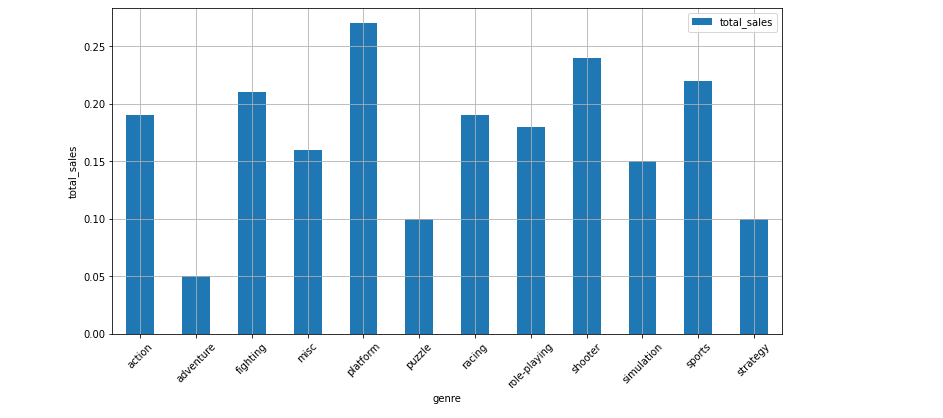

Исходя из полученного графика видно, что наибольшие продажи у игр с жанром action и sports, чуть меньше у shooter и role-playing игр. Я считаю, что это отражает факт заинтересованности людей в более "активных" играх, где игрок получает больше всего удовольствия. Намного меньше людей, играющих в стратегии, пазлы или приключения, возможно это связно с тухлостью и неким однообразием геймплея.

### Вывод 4 этап

Покупатели из Северной Америки намного чаще выбирают игры из категории action, на втором месте с небольшим отрывом от шутеров (shooter) расположились игры из категории спортивные (sports) далее с большим отставанием игры-платформеры и музыкальные.

Самыми популярными платформами оказались x360 и ps2 по ним наибольшие показатели продаж.

Наибольшее кол-во продаж с большим отрывом наблюдается среди игр категории e, то есть игры для всех. Как я говорил выше намного проще продать игру, которая подходит для людей любого возраста.

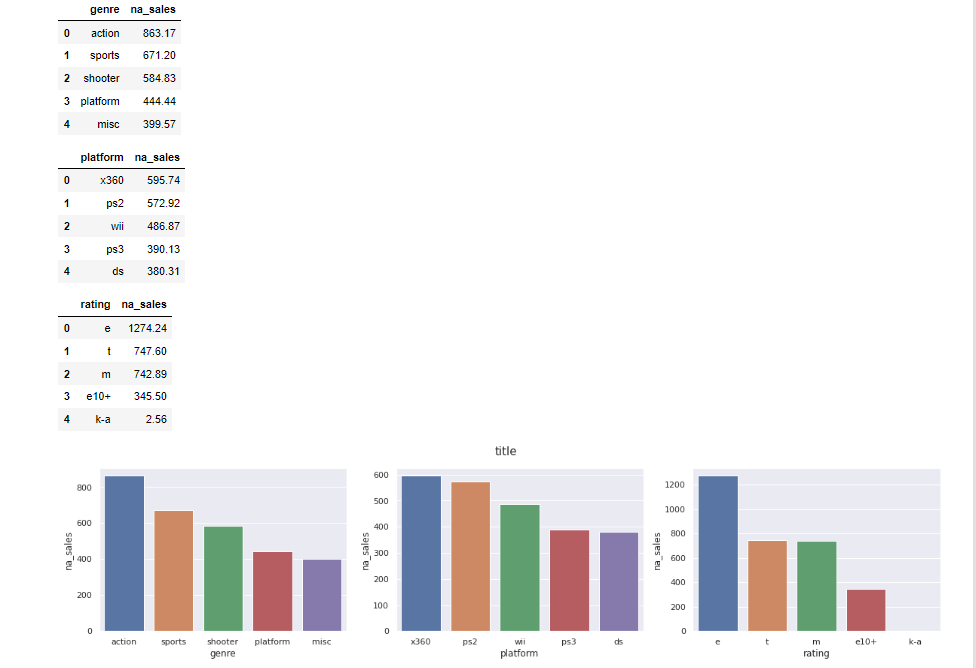

Покупатели из Европы намного чаще выбирают игры из категории action, на втором месте с небольшим отрывом от шутеров (shooter) расположились игры из категории спортивные (sports) далее с большим отставанием игры-гонки и музыкальные.

Самыми популярными платформами оказались ps2 и ps3 по ним наибольшие показатели продаж.

Наибольшее кол-во продаж с большим отрывом наблюдается среди игр категории e, то есть игры для всех. Как я говорил выше намного проще продать игру, которая подходит для людей любого возраста.

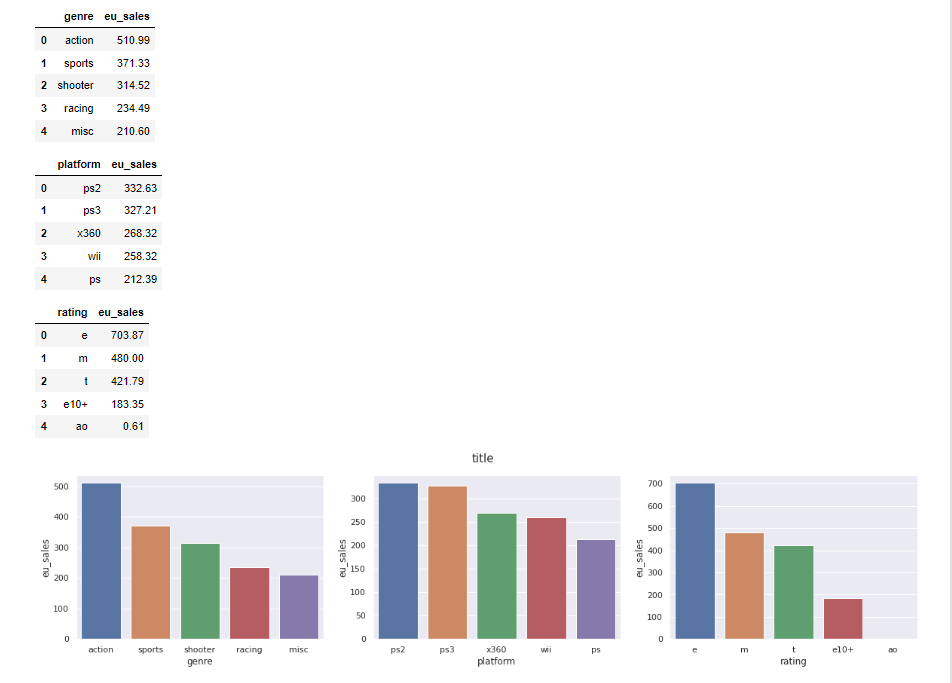

Покупатели из Японии намного чаще выбирают игры из категории role-playing, на втором месте с небольшим отрывом от спортивных (sports) расположились игры из категории action.

Самой популярной платформой оказалась ds. ps2, ps по своим продажам почти идентичны.

Наибольшее кол-во продаж с большим отрывом наблюдается среди игр категории e, то есть игры для всех. Как я говорил выше намного проще продать игру, которая подходит для людей любого возраста.

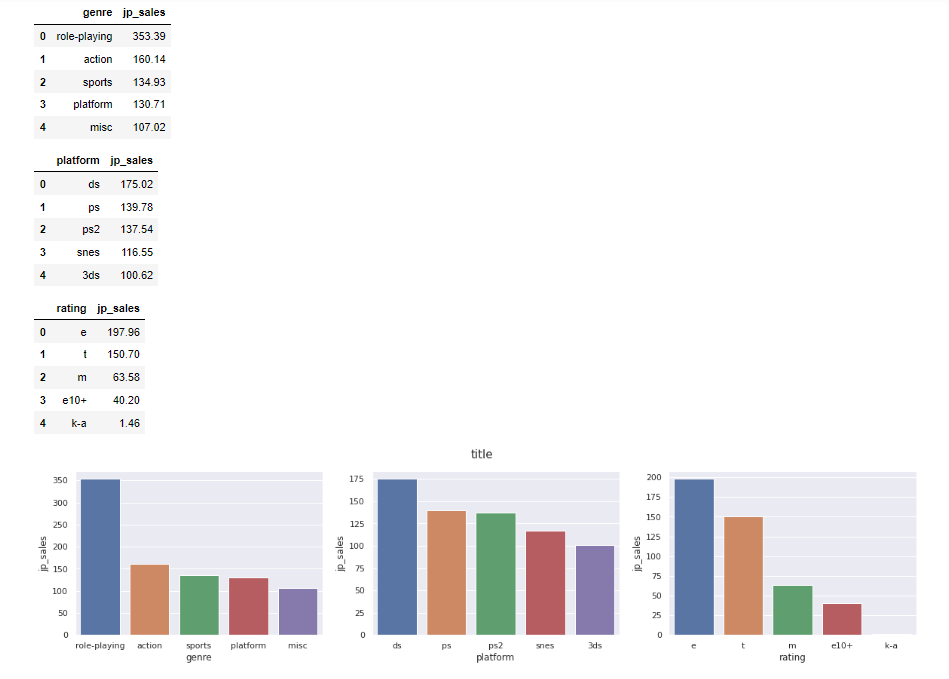

### Вывод 5 этап

Проверьте гипотезы Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Чтобы проверить данные гипотезы воспользуемся критерием стьюдента, для проверки равенства средних двух ген совокупностей.

Проверка осуществляется методом ttest_ind из библиотеки scipy. 

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.